In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          30000 non-null  int64  
 1   Household_ID    30000 non-null  int64  
 2   Vehicle         30000 non-null  int64  
 3   Calendar_Year   30000 non-null  int64  
 4   Model_Year      30000 non-null  int64  
 5   Blind_Make      30000 non-null  object 
 6   Blind_Model     30000 non-null  object 
 7   Blind_Submodel  30000 non-null  object 
 8   Cat1            30000 non-null  object 
 9   Cat2            30000 non-null  object 
 10  Cat3            30000 non-null  object 
 11  Cat4            30000 non-null  object 
 12  Cat5            30000 non-null  object 
 13  Cat6            30000 non-null  object 
 14  Cat7            30000 non-null  object 
 15  Cat8            30000 non-null  object 
 16  Cat9            30000 non-null  object 
 17  Cat10           30000 non-null 

In [135]:
continous_column_candidates = ['Calendar_Year', 'Model_Year', 'Var2', 'Var5', 'Vehicle','NVVar1','NVVar2']
discrete_column_candidates = ['Cat3', 'Cat11', 'Cat8', 'Cat12', 'Cat6', 'OrdCat']

In [136]:
features_column = continous_column_candidates+discrete_column_candidates
df_data = raw_data[features_column]
for dis_col in discrete_column_candidates:
    df_data[dis_col] = df_data[dis_col].fillna(df_data[dis_col].mode()[0])
    df_data[dis_col][df_data[dis_col]=='?'] = df_data[dis_col].mode()[0]
df_label = raw_data['Claim_Amount']
non_zero_index = df_label[df_label>0].index
df_data = df_data.iloc[non_zero_index,:]
label_np = df_label.iloc[non_zero_index].to_numpy()

C:\Users\physe\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\physe\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\physe\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [137]:
#data transform
from sklearn.preprocessing import StandardScaler, OneHotEncoder,Normalizer
from sklearn.compose import ColumnTransformer

In [138]:
filter_list = np.argsort(label_np)[:8300]

In [151]:
full_column = ColumnTransformer([
    ('num',StandardScaler(), continous_column_candidates),
    #('cat', OneHotEncoder(), discrete_column_candidates)
])
label_nor = StandardScaler()
label_np_processed = label_nor.fit_transform(label_np[filter_list].reshape(-1,1))
data_np_processed = full_column.fit_transform(df_data.iloc[filter_list,:])

In [152]:
# regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [153]:
shufflist = np.arange(len(filter_list))
np.random.shuffle(shufflist)
lr = LinearRegression()
lr.fit(data_np_processed[shufflist[:7500],:],label_np_processed[shufflist[:7500]])
pred = lr.predict(data_np_processed[shufflist[7500:],:])

In [154]:
np.random.shuffle(shufflist)
lr = RandomForestRegressor()
lr.fit(data_np_processed[shufflist[:7500],:],label_np_processed[shufflist[:7500]])
pred = lr.predict(data_np_processed[shufflist[7500:],:])

C:\Users\physe\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [155]:
np.sqrt(mean_squared_error(label_nor.inverse_transform(pred),label_nor.inverse_transform(label_np_processed[shufflist[7500:]])))

145.92634815231753

In [156]:
pred_inverse=label_nor.inverse_transform(pred)

In [157]:
test_label_inverse = label_nor.inverse_transform(label_np_processed[shufflist[7500:]])

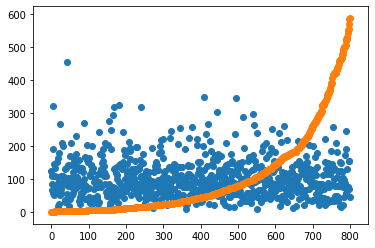

In [158]:
pred_sort_index = np.argsort(test_label_inverse,axis=0)
plt.scatter(np.arange(pred_inverse.shape[0]),pred_inverse[pred_sort_index])
plt.scatter(np.arange(pred_inverse.shape[0]),test_label_inverse[pred_sort_index])

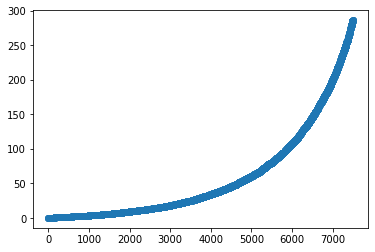

In [159]:
plt.scatter(np.arange(7500),label_np[np.argsort(label_np)[:7500]])

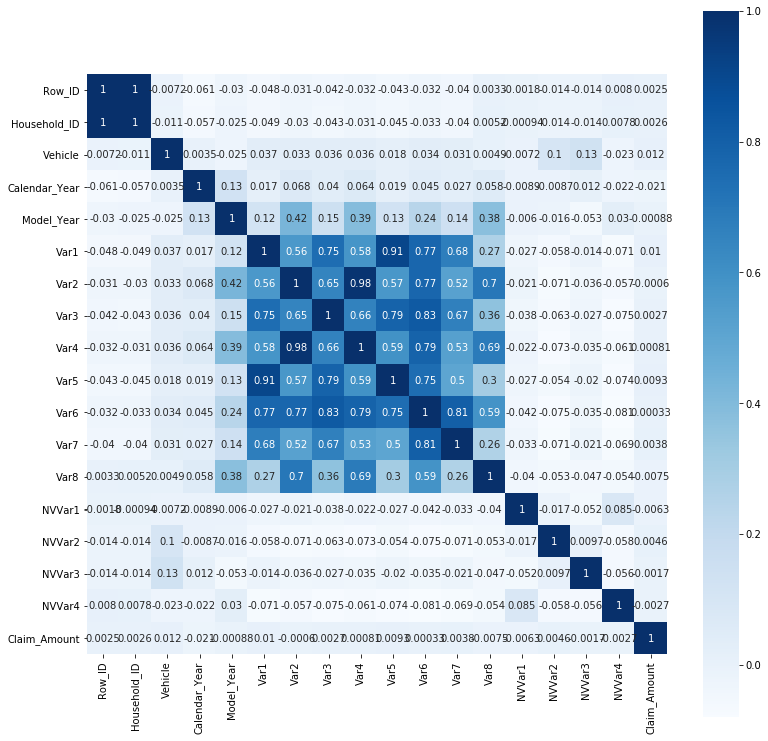

In [160]:
plt.subplots(figsize=(13,13))
sns.heatmap(raw_data.corr(), annot=True, vmax=1, square=True, cmap="Blues")

In [161]:
new_features = raw_data.copy()
for col in ['Var1', 'Var2', 'Var3', 'Var4', 'Var5','Var6','Var7', 'Var8', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4', 'Model_Year']:
    new_features[col] = new_features[col]**4

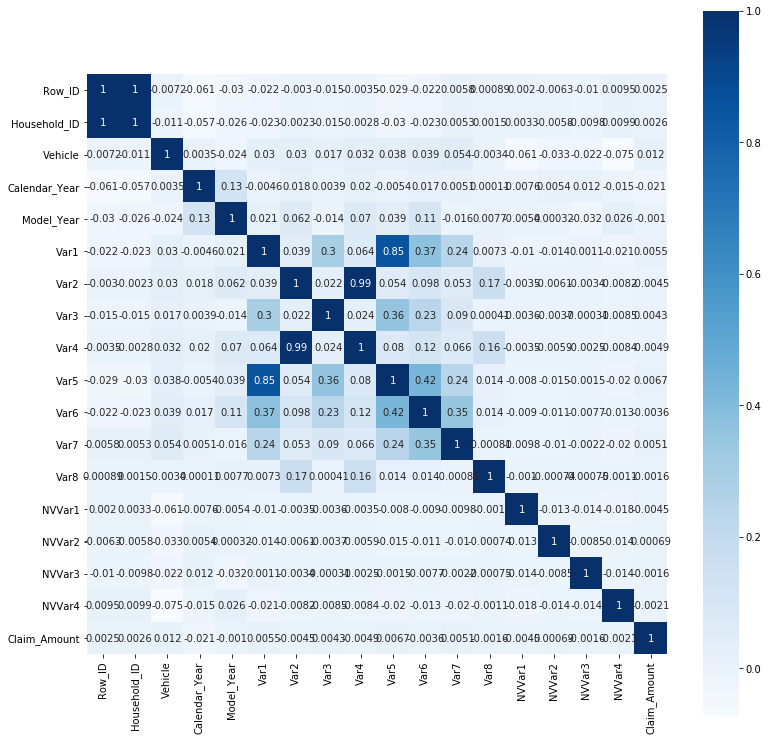

In [97]:
plt.subplots(figsize=(13,13))
sns.heatmap(new_features.corr(), annot=True, vmax=1, square=True, cmap="Blues")

In [ ]:
Linear regression [2 marks].
Ridge regression [2 marks].
Random forests for regression [2 marks].
Gradient tree boosting for regression [2 marks].ipynb_checkpoints

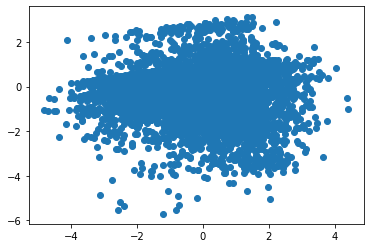

In [171]:
u, s, vh = np.linalg.svd(data_np_processed)
pca_matrix = data_np_processed @ vh[:2,:].T

plt.scatter(pca_matrix[:,0],pca_matrix[:,1])

In [178]:
StandardScaler().fit_transform(X=np.array([1,2,3,4,5,6,7]).reshape((-1,1)))

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])